In [1]:
import os
import warnings

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import pygrib

%matplotlib inline

In [2]:
warnings.filterwarnings('ignore')

In [7]:
# loading NOAA GRIB dataset (Eastern Baltic for 01-01-2022);
filename = '20220101_171021_.grb'
grib_file = os.path.join('..', 'source_data', filename)
grib_data = pygrib.open(grib_file)

grib = grib_data.select()[0]

# selecting data from GRIB dataset;
# Geopotential heigth - from 1 to 65, Mean sea level pressure data - from 66 to 130, Precipitation data - from 131
# to 194, Temperature data - from 195 to 259, Wind speed - from 260 to 389;
mean_sea_level_pressure = grib_data.select()[89]
precipitation_at_surface_level = grib_data.select()[130]
temperature = grib_data.select()[194]
wind_speed = grib_data.select()[259]

pressure_data = mean_sea_level_pressure.values
precipitation_data = precipitation_at_surface_level.values
temperature_data = temperature.values
wind_speed_data = wind_speed.values

In [8]:
lons = np.linspace(float(grib['longitudeOfFirstGridPointInDegrees']),
                   float(grib['longitudeOfLastGridPointInDegrees']), int(grib['Ni']))
lats = np.linspace(float(grib['latitudeOfFirstGridPointInDegrees']),
                   float(grib['latitudeOfLastGridPointInDegrees']), int(grib['Nj']))

grid_lons, grid_lats = np.meshgrid(lons, lats)

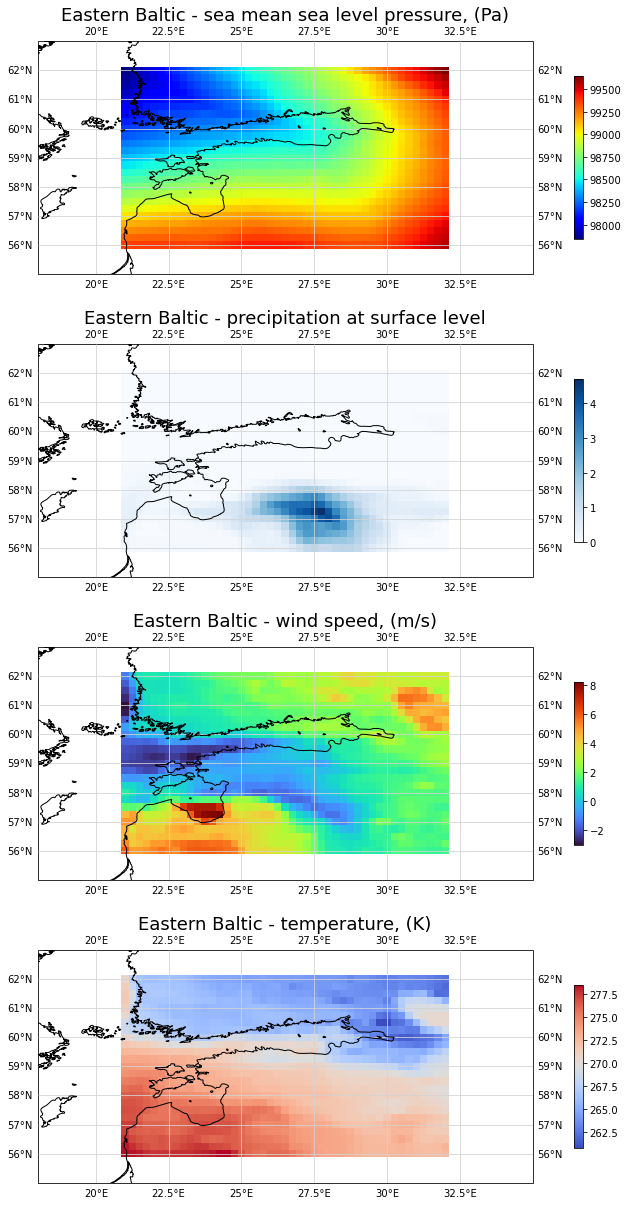

In [9]:
figure = plt.figure(figsize=(15, 21))

# ***** Pressure at sea level ************** #

ax_1 = figure.add_subplot(4, 1, 1, projection=ccrs.PlateCarree())
ax_1.set_extent([18, 35, 55, 63], crs=ccrs.PlateCarree())
ax_1.coastlines(resolution='10m', zorder=10)
ax_1.gridlines(draw_labels=True, color='lightgray', zorder=5)
cs_1 = ax_1.pcolormesh(grid_lons, grid_lats, pressure_data, cmap=plt.cm.jet, zorder=1)
ax_1.set_title('Eastern Baltic - sea mean sea level pressure, (Pa)', fontsize=18)

# ***** Precipitation at surface level ***** #

ax_2 = figure.add_subplot(4, 1, 2, projection=ccrs.PlateCarree())
ax_2.set_extent([18, 35, 55, 63], crs=ccrs.PlateCarree())
ax_2.coastlines(resolution='10m', zorder=10)
ax_2.gridlines(draw_labels=True, color='lightgray', zorder=5)
cs_2 = ax_2.pcolormesh(grid_lons, grid_lats, precipitation_data, cmap=plt.cm.Blues, zorder=1)
ax_2.set_title('Eastern Baltic - precipitation at surface level', fontsize=18)

# ***** Wind speed at surface level ******** #

ax_3 = figure.add_subplot(4, 1, 3, projection=ccrs.PlateCarree())
ax_3.set_extent([18, 35, 55, 63], crs=ccrs.PlateCarree())
ax_3.coastlines(resolution='10m', zorder=10)
ax_3.gridlines(draw_labels=True, color='lightgray', zorder=5)
cs_3 = ax_3.pcolormesh(grid_lons, grid_lats, wind_speed_data, cmap=plt.cm.turbo, zorder=1)
ax_3.set_title('Eastern Baltic - wind speed, (m/s)', fontsize=18)

# ***** Temperature at surface level ******* #

ax_4 = figure.add_subplot(4, 1, 4, projection=ccrs.PlateCarree())
ax_4.set_extent([18, 35, 55, 63], crs=ccrs.PlateCarree())
ax_4.coastlines(resolution='10m', zorder=10)
ax_4.gridlines(draw_labels=True, color='lightgray', zorder=5)
cs_4 = ax_4.pcolormesh(grid_lons, grid_lats, temperature_data, cmap=plt.cm.coolwarm, zorder=1)
ax_4.set_title('Eastern Baltic - temperature, (K)', fontsize=18)

plt.colorbar(cs_1, ax=ax_1, orientation='vertical', shrink=0.7)
plt.colorbar(cs_2, ax=ax_2, orientation='vertical', shrink=0.7)
plt.colorbar(cs_3, ax=ax_3, orientation='vertical', shrink=0.7)
plt.colorbar(cs_4, ax=ax_4, orientation='vertical', shrink=0.7)
plt.subplots_adjust(hspace=0.3)
plt.show()